# Test Notebook

**Simple Execution** is the first test, where I manually instantiate all the necessary classes and perform a non-automatic computation.

**Multi-Round Execution** is the automatic computation of the algorithm.

In [1]:
import os
import numpy as np
import math

from Stationary.core import *
from Stationary.utils import *

from sklearn import linear_model, datasets
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt


## Simple Execution

In [ ]:
w1 = Worker(coef = np.array([0, 0]), intercept = np.array([0]), model=linear_model.LinearRegression())
w2 = Worker(coef = np.array([0, 0]), intercept = np.array([0]), model=linear_model.LinearRegression())
w3 = Worker(coef = np.array([0, 0]), intercept = np.array([0]), model=linear_model.LinearRegression())

In [ ]:
l = []
l.append(w1)
l.append(w2)
l.append(w3)

In [ ]:
dataset_X, dataset_y = datasets.load_diabetes(return_X_y=True)

In [ ]:
server = Server(coef = np.array([0, 0]), intercept = np.array([0]), workers = l, num_features = dataset_X[0].size)

In [ ]:
train_w1_X, train_w2_X, train_w3_X, test_X = np.split(dataset_X, 
                                                      [int(.25 * len(dataset_X)), 
                                                       int(.50 * len(dataset_X)), 
                                                       int(.75 * len(dataset_X))
                                                      ])

In [ ]:
train_w1_y, train_w2_y, train_w3_y, test_y = np.split(dataset_y, 
                                                      [int(.25 * len(dataset_y)), 
                                                       int(.50 * len(dataset_y)), 
                                                       int(.75 * len(dataset_y))
                                                      ])

In [ ]:
train_w1_1, train_w1_2, train_w1_3 = np.split(train_w1_X,  
                                                [int(.33 * len(train_w1_X)), 
                                                int(.66 * len(train_w1_X))
                                                ])

train_w2_1, train_w2_2, train_w2_3 = np.split(train_w2_X,  
                                                [int(.33 * len(train_w2_X)), 
                                                int(.66 * len(train_w2_X))
                                                ])

train_w3_1, train_w3_2, train_w3_3 = np.split(train_w3_X,  
                                                [int(.33 * len(train_w3_X)), 
                                                int(.66 * len(train_w3_X))
                                                ])




train_w1_y_1, train_w1_y_2, train_w1_y_3 = np.split(train_w1_y, 
                                                      [int(.33 * len(train_w1_y)), 
                                                       int(.66 * len(train_w1_y))
                                                      ])

train_w2_y_1, train_w2_y_2, train_w2_y_3 = np.split(train_w2_y, 
                                                      [int(.33 * len(train_w2_y)), 
                                                       int(.66 * len(train_w2_y))
                                                      ])

train_w3_y_1, train_w3_y_2, train_w3_y_3 = np.split(train_w3_y, 
                                                      [int(.33 * len(train_w3_y)), 
                                                       int(.66 * len(train_w3_y))
                                                      ])

In [ ]:
w1.train(X = train_w1_X, y = train_w1_y)
w2.train(X = train_w2_X, y = train_w2_y)
w3.train(X = train_w3_X, y = train_w3_y)


In [ ]:
w3.model.coef_

In [ ]:
server.aggregation()

In [ ]:
print('Server Coef: ', server.coef)
print('Server intercept: ', server.intercept)

In [ ]:
server.return_to_workers()

In [ ]:
w3.coef

In [ ]:
pred_w1 = w1.evaluate(test_X)
print('Mean squared error worker 1: %.2f' 
         % mean_squared_error(test_y, pred_w1))
print('Coefficient of determinaton of worker 1: %.2f'
         % r2_score(test_y, pred_w1))

print('----------')

pred_w2 = w2.evaluate(test_X)
print('Mean squared error worker 2: %.2f' 
         % mean_squared_error(test_y, pred_w2))
print('Coefficient of determinaton of worker 2: %.2f'
         % r2_score(test_y, pred_w2))

print('----------')

pred_w3 = w3.evaluate(test_X)
print('Mean squared error worker 3: %.2f' 
         % mean_squared_error(test_y, pred_w3))
print('Coefficient of determinaton of worker 3: %.2f'
         % r2_score(test_y, pred_w3))

In [ ]:
server.return_to_workers()

In [ ]:
pred_server = server.evaluate(test_X)
print('Mean squared error: %.2f' 
         % mean_squared_error(test_y, pred_server))
print('Coefficient of determinaton: %.2f'
         % r2_score(test_y, pred_server))

# Multi Rounds

In [110]:
num_workers = 10
num_rounds = 100

m = 2.3
c = 1.6

In [111]:
dataset_X = np.linspace(0, 1000, 10000)
np.random.shuffle(dataset_X)

dataset_y =  dataset_X * m + c +  np.random.randn(dataset_X.size) * math.sqrt(0.02)

dataset_X = dataset_X.reshape(-1,1)

In [112]:
worker_list = []
for i in range(0, num_workers):
    worker_list.append(Worker(coef = np.zeros(shape=dataset_X[0].size), intercept = np.zeros(shape=1), model=linear_model.LinearRegression()))

In [113]:
train_percentage = 0.9


train_X, test_X = np.split(dataset_X, 
            [int(train_percentage * len(dataset_X))
            ])

train_y, test_y = np.split(dataset_y, 
            [int(train_percentage * len(dataset_y))
            ])

In [115]:
server = Server(coef = np.zeros(shape=dataset_X[0].size), intercept = np.zeros(shape=1), workers = worker_list, num_features = dataset_X[0].size)

In [116]:
train_list_X = splitDataset(train_X, num_workers, num_rounds)
train_list_y = splitDataset(train_y, num_workers, num_rounds)

In [117]:
error = []
score = []

for i in range(0, num_rounds):
    
    for j in range(0, num_workers):
        worker_list[j].train(X = train_list_X[i*num_workers+j] , y = train_list_y[i*num_workers+j])

    server.aggregation() 
    server.return_to_workers()
    
    pred_server = server.evaluate(test_X)
    print('------ROUND {}------'.format(i+1))
    print('Mean squared error: %.4f' 
          % mean_squared_error(test_y, pred_server))
    print('Coefficient of determinaton: %.4f \n'
          % r2_score(test_y, pred_server))
    error.append(mean_squared_error(test_y, pred_server))
    score.append(r2_score(test_y, pred_server))
    

Intercept: 1.3504883545118673
Intercept: 1.6194066797370397
Intercept: 1.5515688936836796
Intercept: 1.5968776801026934
Intercept: 1.3214914019458774
Intercept: 1.7097853082548227
Intercept: 1.5832164130188175
Intercept: 1.6816236743452464
Intercept: 1.6301599263556454
Intercept: 1.6799282262923043
Sum: [1.57245466]
------ROUND 1------
Mean squared error: 0.0206
Coefficient of determinaton: 1.0000 

Intercept: 1.4492490470929624
Intercept: 1.613907650462238
Intercept: 1.6111308788033512
Intercept: 1.508558358764958
Intercept: 1.6230353305086282
Intercept: 1.4658190222227176
Intercept: 1.6243239480506872
Intercept: 1.621436447176393
Intercept: 1.7163544100772015
Intercept: 1.6429358484631393
Sum: [1.58767509]
------ROUND 2------
Mean squared error: 0.0203
Coefficient of determinaton: 1.0000 

Intercept: 1.5469881711201197
Intercept: 1.7330549359207907
Intercept: 1.5640956661150085
Intercept: 1.5089681904278223
Intercept: 1.482274489220572
Intercept: 1.5299355150320935
Intercept: 1.71179

------ROUND 42------
Mean squared error: 0.0200
Coefficient of determinaton: 1.0000 

Intercept: 1.7344261907730925
Intercept: 1.503074415133824
Intercept: 1.6945523826116187
Intercept: 1.7321699556703152
Intercept: 1.5374266140478312
Intercept: 1.728051330634571
Intercept: 1.6912934779663829
Intercept: 1.5581705221281936
Intercept: 1.6013586327239864
Intercept: 1.7062298477339937
Sum: [1.64867534]
------ROUND 43------
Mean squared error: 0.0200
Coefficient of determinaton: 1.0000 

Intercept: 1.4987455681218762
Intercept: 1.5936285896671052
Intercept: 1.5832709122569213
Intercept: 1.4614396803031013
Intercept: 1.6373779446812478
Intercept: 1.5730933470883883
Intercept: 1.4506363143057115
Intercept: 1.6588455099140447
Intercept: 1.7474547136550882
Intercept: 1.5313383949767285
Sum: [1.5735831]
------ROUND 44------
Mean squared error: 0.0200
Coefficient of determinaton: 1.0000 

Intercept: 1.6510839287071803
Intercept: 1.6307869193329907
Intercept: 1.6565998202283936
Intercept: 1.615958

------ROUND 86------
Mean squared error: 0.0199
Coefficient of determinaton: 1.0000 

Intercept: 1.4964537642997584
Intercept: 1.7345437145618234
Intercept: 1.4000352497619133
Intercept: 1.6294033516109039
Intercept: 1.5791259768450345
Intercept: 1.5671233898267474
Intercept: 1.7916299637548718
Intercept: 1.6054345835883623
Intercept: 1.749009598132261
Intercept: 1.5275150179091952
Sum: [1.60802746]
------ROUND 87------
Mean squared error: 0.0199
Coefficient of determinaton: 1.0000 

Intercept: 1.4255650532004438
Intercept: 1.7094352772239745
Intercept: 1.6900832496016847
Intercept: 1.685757139448242
Intercept: 1.5623359473581786
Intercept: 1.6032594585592506
Intercept: 1.3979788156204904
Intercept: 1.5338646737217232
Intercept: 1.6093088465459005
Intercept: 1.52023468647144
Sum: [1.57378231]
------ROUND 88------
Mean squared error: 0.0199
Coefficient of determinaton: 1.0000 

Intercept: 1.57692201027362
Intercept: 1.3708259492507295
Intercept: 1.7558954515484402
Intercept: 1.681524670

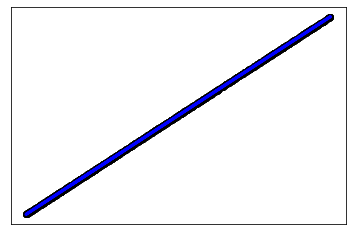

In [118]:
plt.scatter(test_X, test_y,  color='black')
plt.plot(test_X, pred_server, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

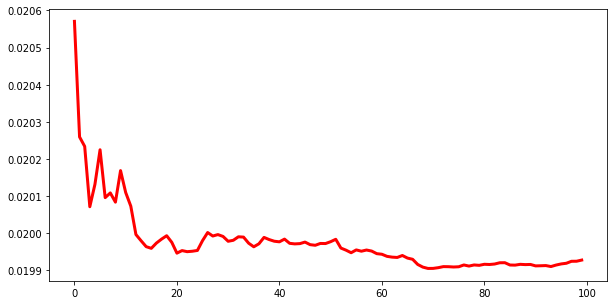

In [119]:
from matplotlib.pyplot import figure

figure(figsize=(10,5))

x = np.arange(num_rounds)

plt.plot(x, error, color='red', linewidth=3)

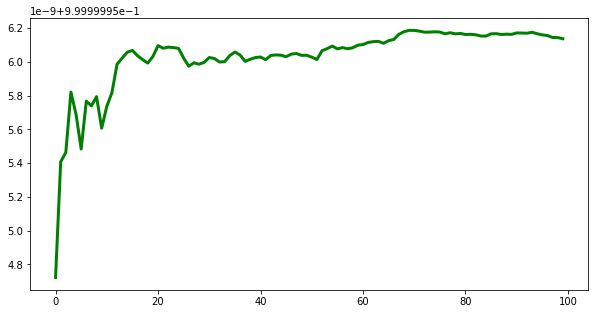

In [120]:
figure(figsize=(10,5))

x = np.arange(num_rounds)

plt.plot(x, score, color='green', linewidth=3)